In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib

# import the necessary packages
from bib.models import ResNet
from bib.az_dataset import load_mnist_dataset
from bib.az_dataset import load_az_dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
from imutils import build_montages
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


# **Load the A-Z and MNIST datasets**

In [3]:
# import the necessary packages
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
import numpy as np
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow


In [6]:
# import the necessary packages
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
import numpy as np
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow


In [1]:
import cv2
import numpy as np

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 100, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#adaptiveThresholding
def adadaptiveThresholding(image):
    return cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#cropping
def cropping(image):
    return image[200:510,200:2200]


#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)


# **1 - Gray Scale**

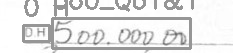

In [ ]:
gray=get_grayscale(img)
cv2_imshow(gray)

# - **Denoising**

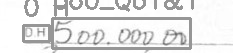

In [ ]:
denoised=remove_noise(gray)
cv2_imshow(gray)

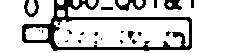

In [ ]:
thresh = thresholding(denoised)
cv2_imshow(thresh)

In [ ]:
pip install easyocr

In [10]:
from easyocr import Reader

In [13]:

def cleanup_text(text):
	# strip out non-ASCII text so we can draw the text on the image
	# using OpenCV
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()

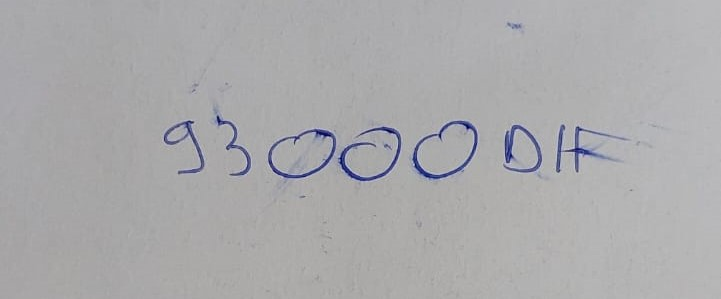

In [32]:
img = cv2.imread('/content/33.jpg')
cv2_imshow(img)

In [33]:
# OCR the input image using EasyOCR
print("[INFO] OCR'ing input image...")
reader = Reader(['en'], gpu = True)
results = reader.readtext(img)


[INFO] OCR'ing input image...


[INFO] 0.6001: 93o00FF


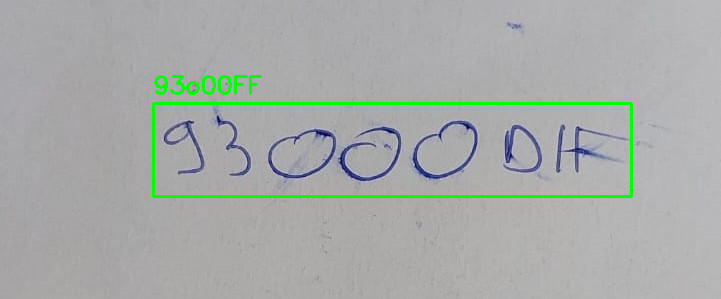

-1

In [34]:
# loop over the results
for (bbox, text, prob) in results:
	# display the OCR'd text and associated probability
	print("[INFO] {:.4f}: {}".format(prob, text))
	# unpack the bounding box
	(tl, tr, br, bl) = bbox
	tl = (int(tl[0]), int(tl[1]))
	tr = (int(tr[0]), int(tr[1]))
	br = (int(br[0]), int(br[1]))
	bl = (int(bl[0]), int(bl[1]))
	# cleanup the text and draw the box surrounding the text along
	# with the OCR'd text itself
	text = cleanup_text(text)
	cv2.rectangle(img, tl, br, (0, 255, 0), 2)
	cv2.putText(img, text, (tl[0], tl[1] - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
# show the output image
cv2_imshow(img)
cv2.waitKey(0)